In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_excel("/Users/anchanghun/Downloads/AI_Study/dataset/Raisin_Dataset/Raisin_Dataset.xlsx")



In [3]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Label')

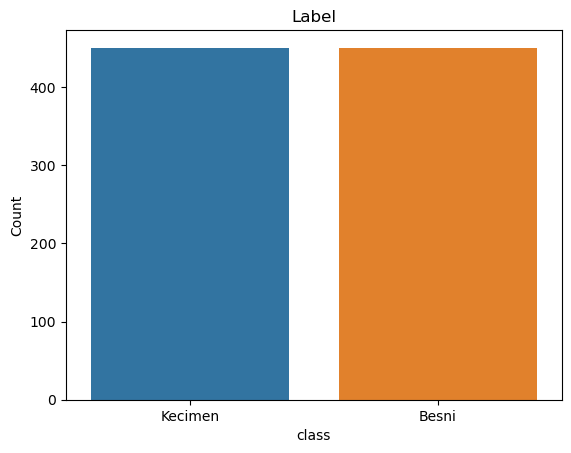

In [4]:
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Label")

In [5]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

### 결측치 없음

In [7]:
X=df.drop('Class',axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [8]:
y=df['Class']
y.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [9]:
y = pd.get_dummies(y).values

In [11]:
print(y)

[[False  True]
 [False  True]
 [False  True]
 ...
 [ True False]
 [ True False]
 [ True False]]


In [12]:
X = X.values

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 


In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(10, input_shape=(7,), activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2, activation='sigmoid'))


optimizer = Adam(learning_rate=0.1)

model.compile(optimizer, 'binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 10)                80        
                                                                 
 dense_66 (Dense)            (None, 8)                 88        
                                                                 
 dense_67 (Dense)            (None, 6)                 54        
                                                                 
 dense_68 (Dense)            (None, 2)                 14        
                                                                 
Total params: 236 (944.00 Byte)
Trainable params: 236 (944.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.5042 - val_loss: 0.6907 - val_accuracy: 0.5389
Epoch 2/30
23/23 [==============================] - 0s 760us/step - loss: 0.7029 - accuracy: 0.4958 - val_loss: 0.7084 - val_accuracy: 0.4611
Epoch 3/30
23/23 [==============================] - 0s 793us/step - loss: 0.7007 - accuracy: 0.4903 - val_loss: 0.6952 - val_accuracy: 0.4611
Epoch 4/30
23/23 [==============================] - 0s 801us/step - loss: 0.6992 - accuracy: 0.4931 - val_loss: 0.6928 - val_accuracy: 0.5389
Epoch 5/30
23/23 [==============================] - 0s 736us/step - loss: 0.7106 - accuracy: 0.4986 - val_loss: 0.7058 - val_accuracy: 0.5389
Epoch 6/30
23/23 [==============================] - 0s 750us/step - loss: 0.7387 - accuracy: 0.4819 - val_loss: 0.8539 - val_accuracy: 0.4611
Epoch 7/30
23/23 [==============================] - 0s 762us/step - loss: 0.7228 - accuracy: 0.4736 - val_loss: 0.6928 - val_accuracy: 0.5389
Epoch 8/

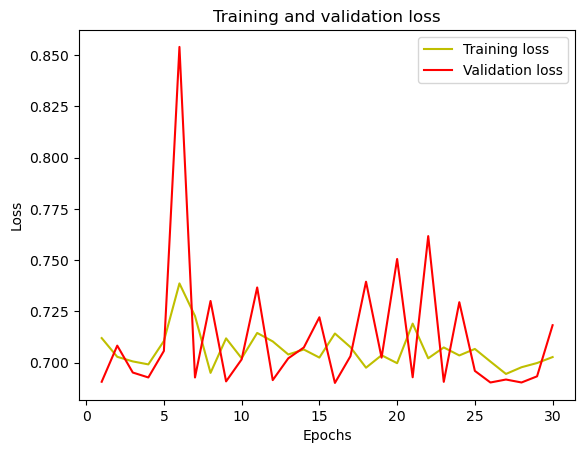

In [76]:

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

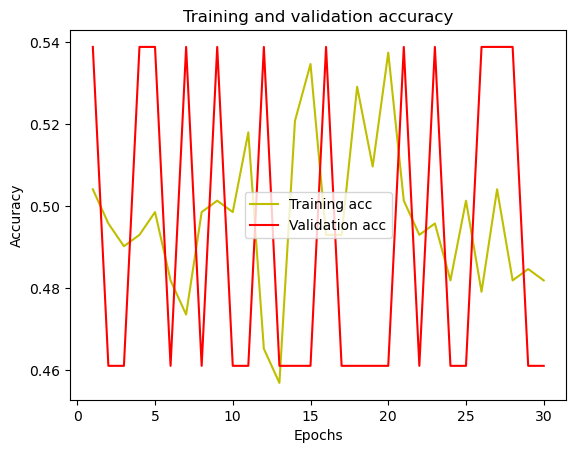

In [77]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.46      1.00      0.63        83

    accuracy                           0.46       180
   macro avg       0.23      0.50      0.32       180
weighted avg       0.21      0.46      0.29       180

[[ 0 97]
 [ 0 83]]


/Users/anchanghun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anchanghun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anchanghun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
